In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
# Reading new cases data of USA.

dayWise = pd.read_csv("../../Member/Pulibandla-Venkatesh/dayWise.csv")
dayWise.drop(['Unnamed: 0'],axis = 1, inplace = True)
dayWise

,countyFIPS,County Name,State,StateFIPS,Date,Number of new cases,Number of new Deaths
0,1001,Autauga County,AL,1,2022-05-30,9,0
1,1003,Baldwin County,AL,1,2022-05-30,55,1
2,1005,Barbour County,AL,1,2022-05-30,1,0
3,1007,Bibb County,AL,1,2022-05-30,9,0
4,1009,Blount County,AL,1,2022-05-30,6,0
...,...,...,...,...,...,...,...
681809,56037,Sweetwater County,WY,56,2023-01-01,0,0
681810,56039,Teton County,WY,56,2023-01-01,0,0
681811,56041,Uinta County,WY,56,2023-01-01,0,0
681812,56043,Washakie County,WY,56,2023-01-01,0,0


In [3]:
# Choosing Virginia State.

virginiaState = dayWise[dayWise['State']=='VA']
virginiaState

,countyFIPS,County Name,State,StateFIPS,Date,Number of new cases,Number of new Deaths
2820,51001,Accomack County,VA,51,2022-05-30,0,0
2821,51003,Albemarle County,VA,51,2022-05-30,0,0
2822,51005,Alleghany County,VA,51,2022-05-30,0,0
2823,51007,Amelia County,VA,51,2022-05-30,0,0
2824,51009,Amherst County,VA,51,2022-05-30,0,0
...,...,...,...,...,...,...,...
681620,51800,City of Suffolk,VA,51,2023-01-01,0,0
681621,51810,City of Virginia Beach,VA,51,2023-01-01,0,0
681622,51820,City of Waynesboro,VA,51,2023-01-01,0,0
681623,51830,City of Williamsburg,VA,51,2023-01-01,0,0


In [4]:
# Group by date to count number of cases and deaths of virginia state for each day.

virginiaState = virginiaState.groupby(['Date']).sum().reset_index()

In [5]:
# Displaying virginia state.

virginiaState

,Date,countyFIPS,StateFIPS,Number of new cases,Number of new Deaths
0,2022-05-30,6818111,6783,0,0
1,2022-05-31,6818111,6783,9943,13
2,2022-06-01,6818111,6783,2970,11
3,2022-06-02,6818111,6783,2918,10
4,2022-06-03,6818111,6783,4056,14
...,...,...,...,...,...
212,2022-12-28,6818111,6783,2435,6
213,2022-12-29,6818111,6783,0,0
214,2022-12-30,6818111,6783,0,0
215,2022-12-31,6818111,6783,0,0


In [6]:
# calculating the length of virginia state dataframe to count number of days in the last six months of 2022.

len(virginiaState)


217

In [7]:
# calculating the number of days.

days = []
for i in range(217):
    days.append(i)

days

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [8]:
# converting these days into dataframe and reading new cases and new deaths to new variables.

xAxis = pd.DataFrame({'days': days})

yCases = virginiaState['Number of new cases']
yDeaths = virginiaState['Number of new Deaths']



In [9]:
# Modeling linear regression for cases.

linearModelCases = LinearRegression()
linearModelCases.fit(xAxis,yCases)

LinearRegression()

In [10]:
# Finding intercept and slope for cases model

print(linearModelCases.intercept_)

print(linearModelCases.coef_)

3088.475499936583
[-10.61231368]


Text(0.5, 1.0, 'Virginia state cases.')

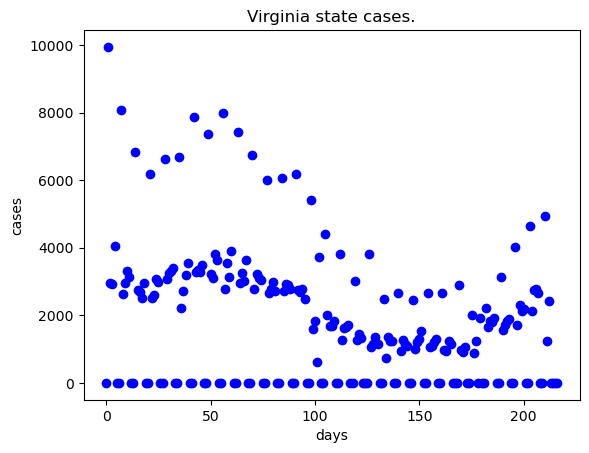

In [11]:
# plotting cases in virginia sate using scatter plot.

plt.scatter(xAxis,yCases, color='blue')
plt.xlabel('days')
plt.ylabel('cases')
plt.title("Virginia state cases.")

In [12]:
# Generating linear trend data for cases in virginia state.

linearCasesPrediction = linearModelCases.predict(xAxis)
linearCasesPrediction

array([3088.47549994, 3077.86318625, 3067.25087257, 3056.63855889,
       3046.0262452 , 3035.41393152, 3024.80161784, 3014.18930415,
       3003.57699047, 2992.96467679, 2982.3523631 , 2971.74004942,
       2961.12773573, 2950.51542205, 2939.90310837, 2929.29079468,
       2918.678481  , 2908.06616732, 2897.45385363, 2886.84153995,
       2876.22922627, 2865.61691258, 2855.0045989 , 2844.39228522,
       2833.77997153, 2823.16765785, 2812.55534417, 2801.94303048,
       2791.3307168 , 2780.71840312, 2770.10608943, 2759.49377575,
       2748.88146206, 2738.26914838, 2727.6568347 , 2717.04452101,
       2706.43220733, 2695.81989365, 2685.20757996, 2674.59526628,
       2663.9829526 , 2653.37063891, 2642.75832523, 2632.14601155,
       2621.53369786, 2610.92138418, 2600.3090705 , 2589.69675681,
       2579.08444313, 2568.47212945, 2557.85981576, 2547.24750208,
       2536.6351884 , 2526.02287471, 2515.41056103, 2504.79824734,
       2494.18593366, 2483.57361998, 2472.96130629, 2462.34899

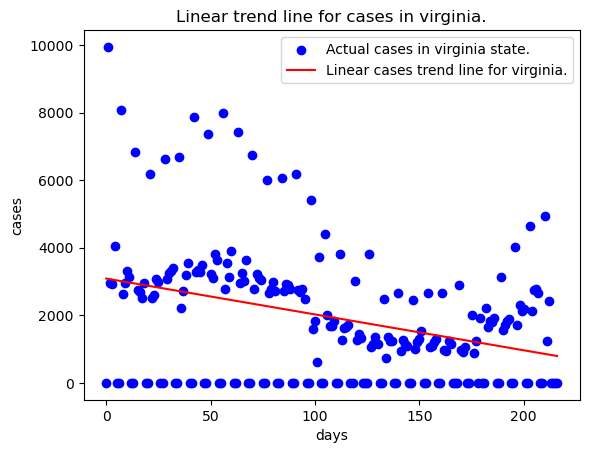

In [13]:
# plotting linear cases trend line.

plt.scatter(xAxis, yCases, color = 'blue', label="Actual cases in virginia state.")
plt.plot(xAxis, linearCasesPrediction, color = 'red', label='Linear cases trend line for virginia.')
plt.xlabel('days')
plt.ylabel('cases')
plt.title('Linear trend line for cases in virginia.')
plt.legend()


In [14]:
# RMSE error linear model cases and actual cases in virginia.
originalCases = yCases
predicCases = linearCasesPrediction
rmse = mean_squared_error(originalCases, predicCases, squared=False)
rmse

1809.9253706218853

In [15]:
# Modelling linear regression for deaths in virginia.

linearModelDeaths = LinearRegression()
linearModelDeaths.fit(xAxis,yDeaths)


LinearRegression()

In [16]:
# generating linear trend data for deaths in virginia.

linearDeathsPrediction = linearModelDeaths.predict(xAxis)
linearDeathsPrediction

array([11.6089291 , 11.59932261, 11.58971613, 11.58010964, 11.57050315,
       11.56089667, 11.55129018, 11.5416837 , 11.53207721, 11.52247072,
       11.51286424, 11.50325775, 11.49365126, 11.48404478, 11.47443829,
       11.4648318 , 11.45522532, 11.44561883, 11.43601235, 11.42640586,
       11.41679937, 11.40719289, 11.3975864 , 11.38797991, 11.37837343,
       11.36876694, 11.35916045, 11.34955397, 11.33994748, 11.330341  ,
       11.32073451, 11.31112802, 11.30152154, 11.29191505, 11.28230856,
       11.27270208, 11.26309559, 11.2534891 , 11.24388262, 11.23427613,
       11.22466964, 11.21506316, 11.20545667, 11.19585019, 11.1862437 ,
       11.17663721, 11.16703073, 11.15742424, 11.14781775, 11.13821127,
       11.12860478, 11.11899829, 11.10939181, 11.09978532, 11.09017884,
       11.08057235, 11.07096586, 11.06135938, 11.05175289, 11.0421464 ,
       11.03253992, 11.02293343, 11.01332694, 11.00372046, 10.99411397,
       10.98450749, 10.974901  , 10.96529451, 10.95568803, 10.94

[]

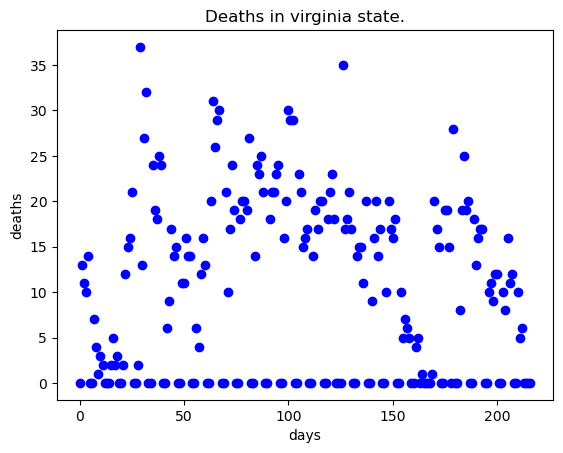

In [17]:
# Plotting deaths in virginia state.

plt.scatter(xAxis, yDeaths, color='blue')
plt.title("Deaths in virginia state.")
plt.xlabel('days')
plt.ylabel("deaths")
plt.plot()

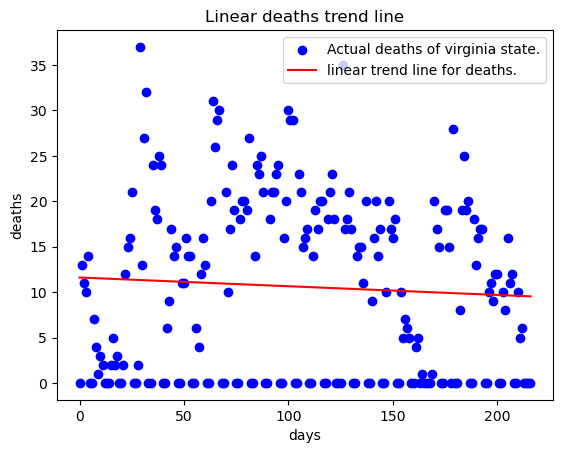

In [18]:
# plotting the linear deaths trend line for virginia state.

plt.scatter(xAxis, yDeaths, color='blue', label='Actual deaths of virginia state.')
plt.plot(xAxis,linearDeathsPrediction, color='red', label='linear trend line for deaths.')
plt.title('Linear deaths trend line')
plt.xlabel('days')
plt.ylabel('deaths')
plt.legend()

In [19]:
#RMSE error for linear model deaths.
originalDeaths = yDeaths
predicDeaths = linearDeathsPrediction
rmse = mean_squared_error(originalDeaths, predicDeaths, squared=False)
rmse

9.610996437836102

# Non Linear regression

In [20]:
# Modeling a non-linear regression of degree 3 for virginia data.
# I have tried using different degrees for optimal fit, degree 3 has the optimal fit for this data.

nonLinear = PolynomialFeatures(degree=3)
days = np.array(days)
days = days.reshape(-1,1)
xAxisPoly = nonLinear.fit_transform(days)
days

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [21]:
# Applying linear model on the non-linear data to genrate non-linear data.

linearModelCases.fit(xAxisPoly, yCases)

LinearRegression()

In [22]:
# Generating non-linear trend data for cases in virginia.

polyCasesPrediction = linearModelCases.predict(xAxisPoly)
polyCasesPrediction

array([2768.06643997, 2786.35886156, 2803.82413722, 2820.47096269,
       2836.30803366, 2851.34404584, 2865.58769495, 2879.0476767 ,
       2891.73268681, 2903.65142097, 2914.81257491, 2925.22484432,
       2934.89692494, 2943.83751246, 2952.0553026 , 2959.55899106,
       2966.35727357, 2972.45884583, 2977.87240355, 2982.60664244,
       2986.67025821, 2990.07194659, 2992.82040327, 2994.92432396,
       2996.39240439, 2997.23334026, 2997.45582728, 2997.06856116,
       2996.08023761, 2994.49955235, 2992.33520109, 2989.59587954,
       2986.2902834 , 2982.42710839, 2978.01505023, 2973.06280461,
       2967.57906727, 2961.57253389, 2955.0519002 , 2948.02586191,
       2940.50311473, 2932.49235437, 2924.00227653, 2915.04157694,
       2905.61895131, 2895.74309533, 2885.42270474, 2874.66647522,
       2863.48310251, 2851.88128231, 2839.86971033, 2827.45708227,
       2814.65209386, 2801.46344081, 2787.89981882, 2773.96992361,
       2759.68245088, 2745.04609635, 2730.06955573, 2714.76152

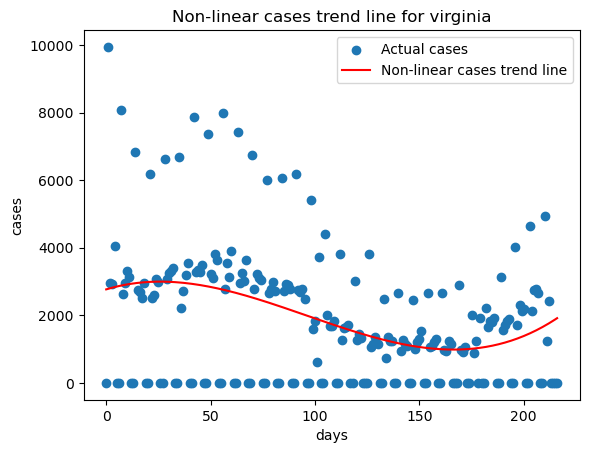

In [23]:
# plotting non-linear cases trend line for virginia.

plt.title("Non-linear cases trend line for virginia")
plt.xlabel('days')
plt.ylabel('cases')
plt.scatter(xAxis, yCases, label='Actual cases')
plt.plot(xAxis, polyCasesPrediction,  color='red', label='Non-linear cases trend line')
plt.legend()

In [24]:
#RMSE error for non-linear cases.
originalPolyCases = yCases
predicPolyCases = polyCasesPrediction
mse = mean_squared_error(originalPolyCases, predicPolyCases, squared=False)
mse

1778.9520263005948

In [25]:
# Applying linear model on non-linear deaths data.

linearModelDeaths.fit(xAxisPoly, yDeaths)

LinearRegression()

In [26]:
# Generating non-linear trend data for deaths.

polyDeathsPrediction = linearModelDeaths.predict(xAxisPoly)
polyDeathsPrediction

array([ 2.63298561,  2.95646437,  3.27450735,  3.58715097,  3.89443163,
        4.19638573,  4.49304968,  4.7844599 ,  5.07065278,  5.35166473,
        5.62753216,  5.89829148,  6.16397909,  6.4246314 ,  6.68028482,
        6.93097575,  7.17674059,  7.41761577,  7.65363767,  7.88484272,
        8.11126731,  8.33294785,  8.54992075,  8.76222242,  8.96988926,
        9.17295768,  9.37146409,  9.56544488,  9.75493648,  9.93997528,
       10.12059769, 10.29684013, 10.46873898, 10.63633067, 10.7996516 ,
       10.95873818, 11.1136268 , 11.26435389, 11.41095584, 11.55346906,
       11.69192996, 11.82637495, 11.95684042, 12.0833628 , 12.20597848,
       12.32472388, 12.43963539, 12.55074942, 12.65810239, 12.7617307 ,
       12.86167075, 12.95795896, 13.05063172, 13.13972544, 13.22527654,
       13.30732142, 13.38589648, 13.46103813, 13.53278278, 13.60116684,
       13.66622671, 13.72799879, 13.7865195 , 13.84182524, 13.89395242,
       13.94293745, 13.98881672, 14.03162666, 14.07140366, 14.10

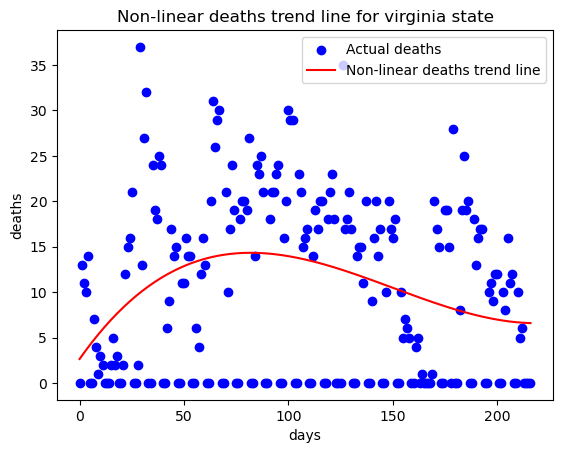

In [27]:
# plotting non-linear deaths trend line.

plt.title('Non-linear deaths trend line for virginia state')
plt.xlabel('days')
plt.ylabel('deaths')
plt.scatter(xAxis, yDeaths, color='blue', label='Actual deaths')
plt.plot(xAxis, polyDeathsPrediction, color='red', label='Non-linear deaths trend line')
plt.legend()

In [28]:
# RMSE error for non-linear deaths data.
originalPolyDeaths = yDeaths
predicPolyDeaths = polyDeathsPrediction
mse = mean_squared_error(originalPolyDeaths, predicPolyDeaths, squared=False)
mse

9.148398406836286

# Top counties

In this step, I am going to select top 5 counties for highest number of cases in virginia state.

In [29]:
counties = dayWise[dayWise['State']=='VA']
counties.loc[counties['Number of new cases']<0, 'Number of new cases']=0
counties.loc[counties['Number of new Deaths']<0, 'Number of new Deaths']=0


In [30]:
# Grouping data on county name to find total number of cases in each state.

countiesGroup = counties.groupby(['County Name'])['Number of new cases', 'Number of new Deaths'].sum().reset_index()


C:\Users\venka\AppData\Local\Temp\ipykernel_17608\2244776869.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  countiesGroup = counties.groupby(['County Name'])['Number of new cases', 'Number of new Deaths'].sum().reset_index()


In [31]:
countiesGroup

,County Name,Number of new cases,Number of new Deaths
0,Accomack County,1563,8
1,Albemarle County,4813,39
2,Alleghany County,926,13
3,Amelia County,688,6
4,Amherst County,1633,18
...,...,...,...
128,Washington County,3695,33
129,Westmoreland County,810,6
130,Wise County,3360,32
131,Wythe County,1844,19


In [32]:
# choosing top 5 counties with highest number of cases.

counties5 = countiesGroup.sort_values(by = 'Number of new cases', ascending = False)
counties5.head(5)

,County Name,Number of new cases,Number of new Deaths
66,Fairfax County,55369,200
110,Prince William County,22203,63
90,Loudoun County,19152,45
20,Chesterfield County,18244,103
55,City of Virginia Beach,18078,100


In [33]:
# Printing all the county names in virginia.

counties['County Name'].unique()

array(['Accomack County ', 'Albemarle County ', 'Alleghany County ',
       'Amelia County ', 'Amherst County ', 'Appomattox County ',
       'Arlington County ', 'Augusta County ', 'Bath County ',
       'Bedford County ', 'Bland County ', 'Botetourt County ',
       'Brunswick County ', 'Buchanan County ', 'Buckingham County ',
       'Campbell County ', 'Caroline County ', 'Carroll County ',
       'Charles City County ', 'Charlotte County ',
       'Chesterfield County ', 'Clarke County ', 'Craig County ',
       'Culpeper County ', 'Cumberland County ', 'Dickenson County ',
       'Dinwiddie County ', 'Essex County ', 'Fairfax County ',
       'Fauquier County ', 'Floyd County ', 'Fluvanna County ',
       'Franklin County ', 'Frederick County ', 'Giles County ',
       'Gloucester County ', 'Goochland County ', 'Grayson County ',
       'Greene County ', 'Greensville County ', 'Halifax County ',
       'Hanover County ', 'Henrico County ', 'Henry County ',
       'Highland County

In [34]:
# Choosing top 5 counties into separate dataframes.

county1 = counties[counties['County Name'].isin(['Fairfax County '])].reset_index()
county2 = counties[counties['County Name'].isin(['Prince William County '])].reset_index()
county3 = counties[counties['County Name'].isin(['Loudoun County '])].reset_index()
county4 = counties[counties['County Name'].isin(['Chesterfield County '])].reset_index()
county5 = counties[counties['County Name'].isin(['City of Virginia Beach'])].reset_index()

In [35]:
# Fairfax county data.
county1

,index,countyFIPS,County Name,State,StateFIPS,Date,Number of new cases,Number of new Deaths
0,2848,51059,Fairfax County,VA,51,2022-05-30,0,0
1,5990,51059,Fairfax County,VA,51,2022-05-31,1685,1
2,9132,51059,Fairfax County,VA,51,2022-06-01,516,1
3,12274,51059,Fairfax County,VA,51,2022-06-02,360,1
4,15416,51059,Fairfax County,VA,51,2022-06-03,704,1
...,...,...,...,...,...,...,...,...
212,668952,51059,Fairfax County,VA,51,2022-12-28,245,1
213,672094,51059,Fairfax County,VA,51,2022-12-29,0,0
214,675236,51059,Fairfax County,VA,51,2022-12-30,0,0
215,678378,51059,Fairfax County,VA,51,2022-12-31,0,0


In [36]:
# Reading county1 cases and deaths.

yCasesCounty1 = county1['Number of new cases']
yDeathsCounty1 = county1['Number of new Deaths']

In [37]:
yCasesCounty1

0         0
1      1685
2       516
3       360
4       704
       ... 
212     245
213       0
214       0
215       0
216       0
Name: Number of new cases, Length: 217, dtype: int64

In [38]:
linearModelCases.fit(xAxisPoly, yCasesCounty1)

LinearRegression()

In [39]:
# Generating non-linear cases trend data for county1.

casesPredictionCounty1 = linearModelCases.predict(xAxisPoly)
casesPredictionCounty1

array([520.20618939, 516.73478199, 513.25993807, 509.78198719,
       506.30125889, 502.81808272, 499.3327882 , 495.8457049 ,
       492.35716236, 488.86749012, 485.37701772, 481.88607471,
       478.39499063, 474.90409503, 471.41371746, 467.92418745,
       464.43583456, 460.94898832, 457.46397829, 453.981134  ,
       450.50078499, 447.02326083, 443.54889104, 440.07800518,
       436.61093278, 433.1480034 , 429.68954657, 426.23589185,
       422.78736877, 419.34430689, 415.90703574, 412.47588486,
       409.05118382, 405.63326214, 402.22244937, 398.81907507,
       395.42346876, 392.03596   , 388.65687834, 385.2865533 ,
       381.92531445, 378.57349133, 375.23141347, 371.89941043,
       368.57781175, 365.26694697, 361.96714563, 358.67873729,
       355.40205149, 352.13741777, 348.88516567, 345.64562474,
       342.41912453, 339.20599457, 336.00656442, 332.82116362,
       329.65012171, 326.49376824, 323.35243275, 320.22644478,
       317.11613389, 314.02182961, 310.94386149, 307.88

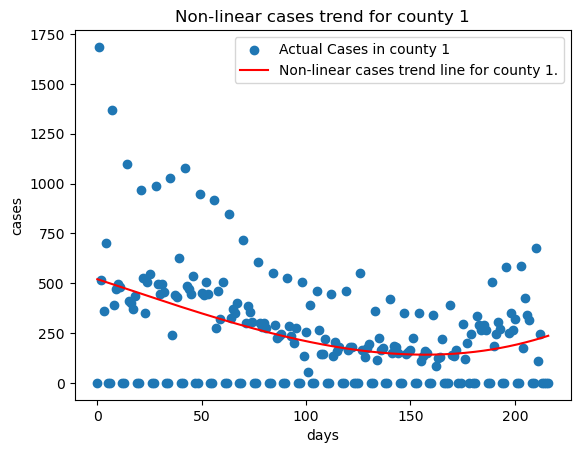

In [40]:
# plotting non-linear cases trend line for county1.

plt.scatter(xAxis, yCasesCounty1, label='Actual Cases in county 1')
plt.plot(xAxis, casesPredictionCounty1,  color='red', label='Non-linear cases trend line for county 1.')
plt.title('Non-linear cases trend for county 1')
plt.xlabel('days')
plt.ylabel('cases')
plt.legend()

In [41]:
# RMSE error for non-linear cases trend data.
originalPolyCasesC1 = yCasesCounty1
predicPolyCasesC1 = casesPredictionCounty1
rmse = mean_squared_error(originalPolyCasesC1, predicPolyCasesC1, squared=False)
rmse

243.38815651122138

In [42]:
linearModelDeaths.fit(xAxisPoly, yDeathsCounty1)

LinearRegression()

In [43]:
# Generating non-linear deaths trend data for county 1.

deathsPredictionCounty1 = linearModelDeaths.predict(xAxisPoly)
deathsPredictionCounty1

array([0.13244055, 0.16391844, 0.19485297, 0.22524799, 0.25510735,
       0.28443491, 0.31323452, 0.34151004, 0.36926531, 0.39650419,
       0.42323052, 0.44944817, 0.47516098, 0.50037281, 0.5250875 ,
       0.54930892, 0.57304091, 0.59628733, 0.61905202, 0.64133885,
       0.66315165, 0.68449429, 0.70537062, 0.72578449, 0.74573975,
       0.76524025, 0.78428986, 0.8028924 , 0.82105176, 0.83877176,
       0.85605627, 0.87290914, 0.88933421, 0.90533535, 0.92091641,
       0.93608123, 0.95083368, 0.96517759, 0.97911683, 0.99265525,
       1.00579669, 1.01854502, 1.03090407, 1.04287772, 1.0544698 ,
       1.06568418, 1.07652469, 1.08699521, 1.09709957, 1.10684162,
       1.11622524, 1.12525425, 1.13393252, 1.14226391, 1.15025225,
       1.15790141, 1.16521523, 1.17219757, 1.17885228, 1.18518322,
       1.19119423, 1.19688917, 1.20227188, 1.20734623, 1.21211607,
       1.21658524, 1.2207576 , 1.22463701, 1.2282273 , 1.23153235,
       1.23455599, 1.23730208, 1.23977447, 1.24197703, 1.24391

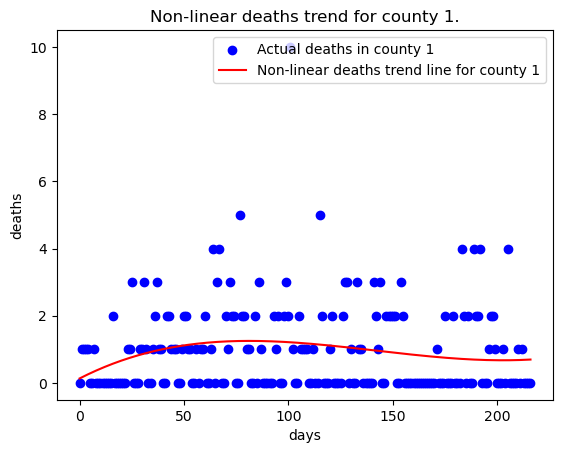

In [44]:
# plotting non-linear deaths trend for county 1.

plt.scatter(xAxis, yDeathsCounty1, color='blue', label='Actual deaths in county 1')
plt.plot(xAxis, deathsPredictionCounty1, color='red', label='Non-linear deaths trend line for county 1')
plt.title('Non-linear deaths trend for county 1.')
plt.xlabel('days')
plt.ylabel('deaths')
plt.legend()

In [45]:
# RMSE error fpr non-linear deaths data for county 1.
originalPolyDeathsC1 = yDeathsCounty1
predicPolyDeathsC1 = deathsPredictionCounty1
mse = mean_squared_error(originalPolyDeathsC1, predicPolyDeathsC1, squared=False)
mse

1.274954842958111

In [46]:
# Reading cases and deaths data for county 2.

yCasesCounty2 = county2['Number of new cases']
yDeathsCounty2 = county2['Number of new Deaths']

In [47]:
linearModelCases.fit(xAxisPoly, yCasesCounty2)
linearModelDeaths.fit(xAxisPoly, yDeathsCounty2)

LinearRegression()

In [48]:
# Generating non-linear cases and deaths trend data for county 2.

casesPredictionCounty2 = linearModelCases.predict(xAxisPoly)
deathsPredictionCounty2 = linearModelDeaths.predict(xAxisPoly)

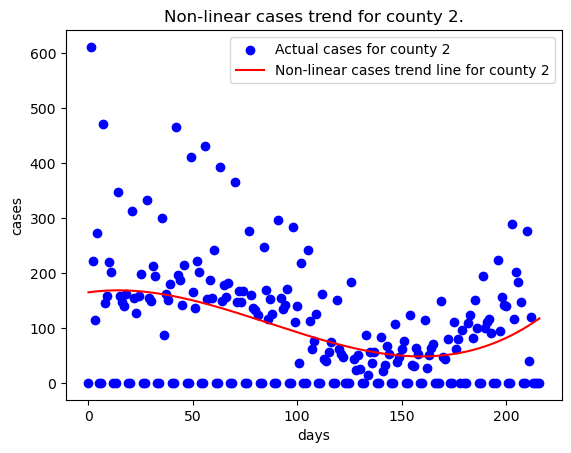

In [49]:
# plotting non-linear cases trend line for county 2.

plt.scatter(xAxis, yCasesCounty2, color='blue', label='Actual cases for county 2')
plt.plot(xAxis, casesPredictionCounty2, color='red', label='Non-linear cases trend line for county 2')
plt.title('Non-linear cases trend for county 2.')
plt.xlabel('days')
plt.ylabel('cases')
plt.legend()

In [50]:
# RMSE error for non-linear cases data for county 2.

originalPolyCasesC2 = yCasesCounty2
predicPolyCasesC2 = casesPredictionCounty2
rmse = mean_squared_error(originalPolyCasesC2, predicPolyCasesC2, squared=False)
rmse

97.85964006409478

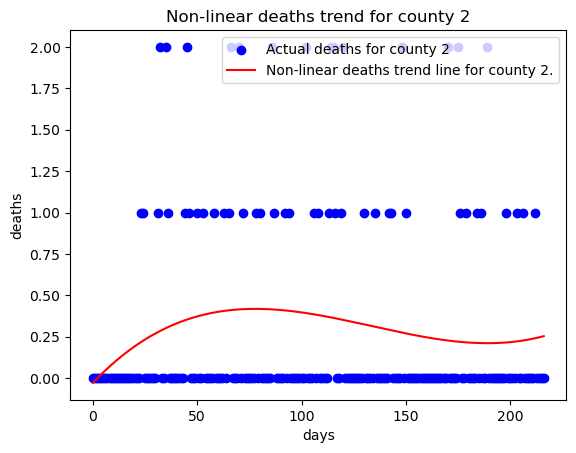

In [51]:
# plotting non-linear deaths trend line for county 2.

plt.scatter(xAxis, yDeathsCounty2, color='blue', label='Actual deaths for county 2')
plt.plot(xAxis, deathsPredictionCounty2, color='red', label='Non-linear deaths trend line for county 2.')
plt.title('Non-linear deaths trend for county 2')
plt.xlabel('days')
plt.ylabel('deaths')
plt.legend()

In [52]:
# RMSE for non-linear deaths data for county 2.

originalPolyDeathsC2 = yDeathsCounty2
predicPolyDeathsC2 = deathsPredictionCounty2
rmse = mean_squared_error(originalPolyDeathsC2, predicPolyDeathsC2, squared=False)
rmse

0.5701946717169496

In [53]:
# Reading county 3 cases and deaths.

yCasesCounty3 = county3['Number of new cases']
yDeathsCounty3 = county3['Number of new Deaths']

In [54]:
# Fitting the polynomial data.

linearModelCases.fit(xAxisPoly, yCasesCounty3)
linearModelDeaths.fit(xAxisPoly, yDeathsCounty3)

LinearRegression()

In [55]:
# Generating non-linear cases and deaths trend for county 3.

casesPredictionCounty3 = linearModelCases.predict(xAxisPoly)
deathsPredictionCounty3 = linearModelDeaths.predict(xAxisPoly)

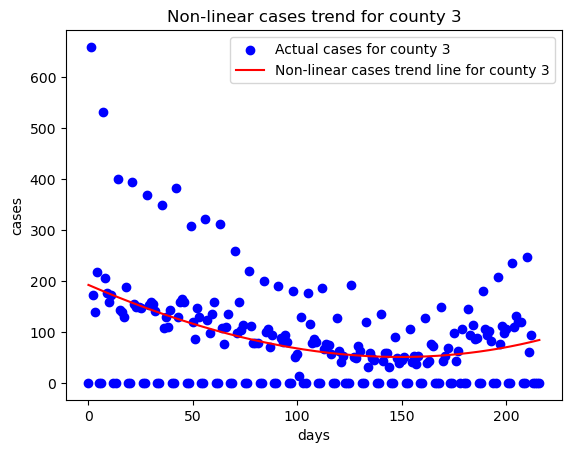

In [56]:
# plotting non-linear cases trend line for county 3.

plt.scatter(xAxis, yCasesCounty3, color='blue', label='Actual cases for county 3')
plt.plot(xAxis, casesPredictionCounty3, color='red', label='Non-linear cases trend line for county 3')
plt.title('Non-linear cases trend for county 3')
plt.xlabel('days')
plt.ylabel('cases')
plt.legend()

In [57]:
# RMSE error for non-linear cases data for county 3

originalPolyCasesC3 = yCasesCounty3
predicPolyCasesC3 = casesPredictionCounty3
rmse = mean_squared_error(originalPolyCasesC3, predicPolyCasesC3, squared=False)
rmse

88.54968441630119

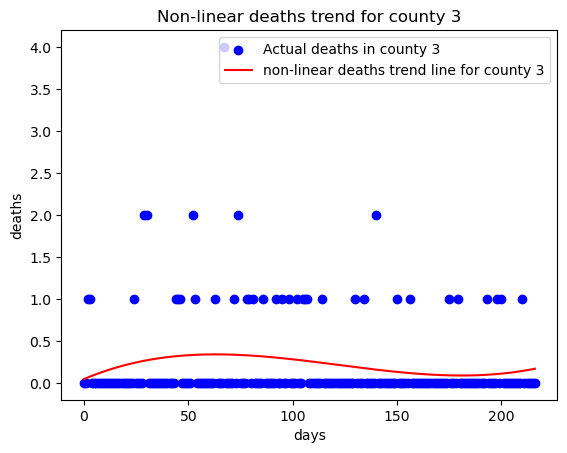

In [58]:
# plotting non-linear deaths trend line for county 3.

plt.scatter(xAxis, yDeathsCounty3, color='blue', label='Actual deaths in county 3')
plt.plot(xAxis, deathsPredictionCounty3, color='red', label='non-linear deaths trend line for county 3')
plt.title('Non-linear deaths trend for county 3')
plt.xlabel('days')
plt.ylabel('deaths')
plt.legend()

In [59]:
# RMSE eeror for non-linear deaths data.

originalPolyDeathsC3 = yDeathsCounty3
predicPolyDeathsC3 = deathsPredictionCounty3
rmse = mean_squared_error(originalPolyDeathsC3, predicPolyDeathsC3, squared=False)
rmse

0.5072846223995535

In [60]:
# Reading cases and deaths data for county 4.

yCasesCounty4 = county4['Number of new cases']
yDeathsCounty4 = county4['Number of new Deaths']

In [61]:
# fitting non-linear data.

linearModelCases.fit(xAxisPoly, yCasesCounty4)
linearModelDeaths.fit(xAxisPoly, yDeathsCounty4)

LinearRegression()

In [62]:
# generating non-linear cases and deaths trend data.

casesPredictionCounty4 = linearModelCases.predict(xAxisPoly)
deathsPredictionCounty4 = linearModelDeaths.predict(xAxisPoly)

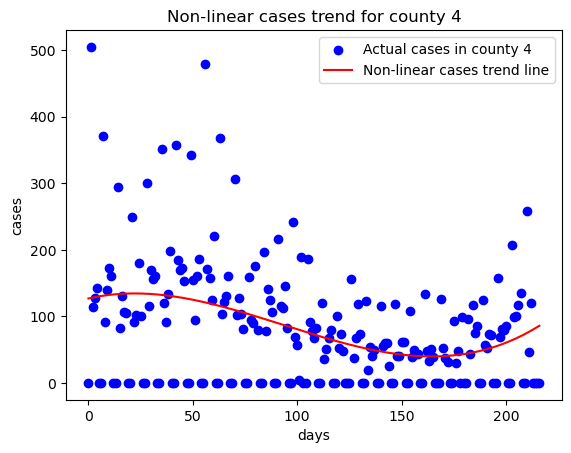

In [63]:
# plotting non-linear cases trend line for county 4.

plt.scatter(xAxis, yCasesCounty4, color='blue', label='Actual cases in county 4')
plt.plot(xAxis, casesPredictionCounty4, color='red', label='Non-linear cases trend line')
plt.title('Non-linear cases trend for county 4')
plt.xlabel('days')
plt.ylabel('cases')
plt.legend()

In [64]:
# RMSE error for non-linear cases data of county 4

originalPolyCasesC4 = yCasesCounty4
predicPolyCasesC4 = casesPredictionCounty4
rmse = mean_squared_error(originalPolyCasesC4, predicPolyCasesC4, squared=False)
rmse

83.31105867501222

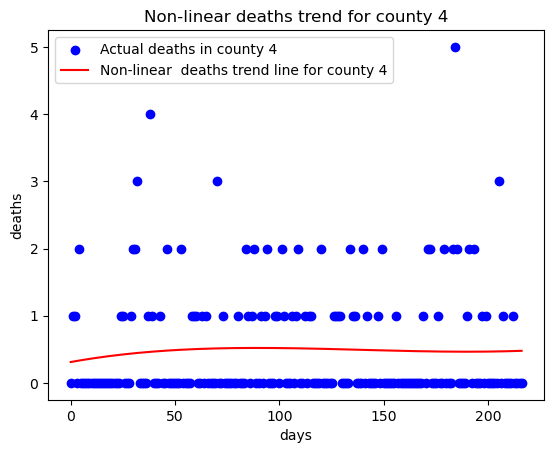

In [65]:
# plotting non-linear deaths trend line of county 4.

plt.scatter(xAxis, yDeathsCounty4, color='blue', label='Actual deaths in county 4')
plt.plot(xAxis, deathsPredictionCounty4, color='red', label='Non-linear  deaths trend line for county 4')
plt.title('Non-linear deaths trend for county 4')
plt.xlabel('days')
plt.ylabel('deaths')
plt.legend()

In [66]:
# RMSE error for non-linear deaths data.

originalPolyDeathsC4 = yDeathsCounty4
predicPolyDeathsC4 = deathsPredictionCounty4
rmse = mean_squared_error(originalPolyDeathsC4, predicPolyDeathsC4, squared=False)
rmse

0.8193120681433574

In [67]:
# reading case and deaths data of county 5.

yCasesCounty5 = county5['Number of new cases']
yDeathsCounty5 = county5['Number of new Deaths']

In [68]:
# fitting non-linear data.

linearModelCases.fit(xAxisPoly, yCasesCounty5)
linearModelDeaths.fit(xAxisPoly, yDeathsCounty5)

LinearRegression()

In [69]:
# Generating non-linear trend data of cases and deaths in county 5

casesPredictionCounty5 = linearModelCases.predict(xAxisPoly)
deathsPredictionCounty5 = linearModelDeaths.predict(xAxisPoly)

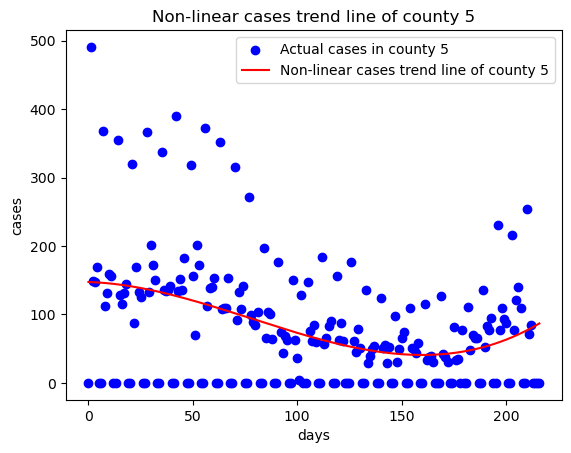

In [70]:
# plotting non-linear cases trend line of county 5

plt.scatter(xAxis, yCasesCounty5, color='blue', label='Actual cases in county 5')
plt.plot(xAxis, casesPredictionCounty5, color='red', label='Non-linear cases trend line of county 5')
plt.title('Non-linear cases trend line of county 5')
plt.xlabel('days')
plt.ylabel('cases')
plt.legend()

In [71]:
# RMSE error for non-linear cases data of county 5.

originalPolyCasesC5 = yCasesCounty5
predicPolyCasesC5 = casesPredictionCounty5
rmse = mean_squared_error(originalPolyCasesC5, predicPolyCasesC5, squared=False)
rmse

82.41510437035109

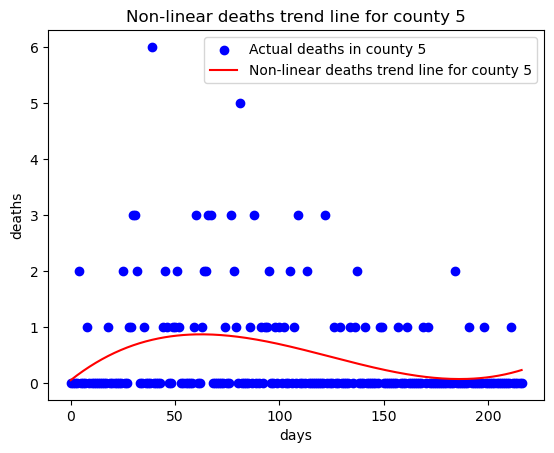

In [72]:
# plotting non-linear deaths trend line of county 5.

plt.scatter(xAxis, yDeathsCounty5, color='blue', label='Actual deaths in county 5')
plt.plot(xAxis, deathsPredictionCounty5, color='red', label='Non-linear deaths trend line for county 5')
plt.title('Non-linear deaths trend line for county 5')
plt.xlabel('days')
plt.ylabel('deaths')
plt.legend()

In [73]:
# RMSE error for non-linear deaths data of county 5.

originalPolyDeathsC5 = yDeathsCounty5
predicPolyDeathsC5 = deathsPredictionCounty5
rmse = mean_squared_error(originalPolyDeathsC5, predicPolyDeathsC5, squared=False)
rmse

0.8738202065035134

# Hypothesis Testing

In [74]:
# Reading enrichment data for hypothesis testing.

enrichmentCombined = pd.read_csv("../../Member/Pulibandla-Venkatesh/enrichmentCombined.csv")
enrichmentCombined.drop('Unnamed: 0', axis=1, inplace = True)
enrichmentCombined

C:\Users\venka\AppData\Local\Temp\ipykernel_17608\33891018.py:3: DtypeWarning: Columns (23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  enrichmentCombined = pd.read_csv("../../Member/Pulibandla-Venkatesh/enrichmentCombined.csv")


,County Name,State,Date,Number of new cases,Total Population,Male population,Female Population,Sex Ratio,Population under 5 Years,Population 5 to 9 Years,...,Population of White Race,Population of Black Race,Population of American Indian and Alaska Native,Population of Asian Race,Population of Native Hawaiian and Other Pacific Islander,Total Housing Units,Population of Citizen Over 18,Population of Male Citizen,Population of Female Citizen,population
0,Baldwin County,AL,2022-05-30,55,239294,115696,123598,93.6,12360,12848,...,198355,21305,884,1956,0,128533,185566,90007,95559,223234
1,Baldwin County,AL,2022-05-31,183,239294,115696,123598,93.6,12360,12848,...,198355,21305,884,1956,0,128533,185566,90007,95559,223234
2,Baldwin County,AL,2022-06-01,68,239294,115696,123598,93.6,12360,12848,...,198355,21305,884,1956,0,128533,185566,90007,95559,223234
3,Baldwin County,AL,2022-06-02,68,239294,115696,123598,93.6,12360,12848,...,198355,21305,884,1956,0,128533,185566,90007,95559,223234
4,Baldwin County,AL,2022-06-03,0,239294,115696,123598,93.6,12360,12848,...,198355,21305,884,1956,0,128533,185566,90007,95559,223234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180105,Natrona County,WY,2022-12-28,0,79555,41070,38485,106.7,4733,4844,...,69303,72,598,228,0,37051,59929,30603,29326,79858
180106,Natrona County,WY,2022-12-29,0,79555,41070,38485,106.7,4733,4844,...,69303,72,598,228,0,37051,59929,30603,29326,79858
180107,Natrona County,WY,2022-12-30,0,79555,41070,38485,106.7,4733,4844,...,69303,72,598,228,0,37051,59929,30603,29326,79858
180108,Natrona County,WY,2022-12-31,0,79555,41070,38485,106.7,4733,4844,...,69303,72,598,228,0,37051,59929,30603,29326,79858


In [75]:
# Cleaning the data and grouping by county name.

enrichmentCombined[enrichmentCombined['Number of new cases'] <0] =0
enrichmentCombined = enrichmentCombined.groupby(['County Name']).sum()
enrichmentCombined

,Number of new cases,Total Population,Male population,Female Population,Sex Ratio,Population under 5 Years,Population 5 to 9 Years,Population 10 to 14 Years,Population 15 to 19 Years,Population 20 to 24 Years,...,Population 60 to 64 Years,Population 65 to 74 Years,Population 75 to 84 Years,Population Above 85 Years,Meadin Age Population,Total Housing Units,Population of Citizen Over 18,Population of Male Citizen,Population of Female Citizen,population
County Name,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0.0,0,0,0,0,0,...,0,0,0,0,0.0,0,0,0,0,0
Ada County,20339,111089027,55841695,55247332,21938.7,5833394,6635643,7934171,7344365,6512170,...,6273036,10836112,4875773,1523774,8289.4,44397332,82639025,41564831,41074194,104504379
Adams County,31065,135377799,68539826,66837973,43817.6,8082110,8671449,10176562,9436125,8755300,...,8206990,11081140,4528566,1767452,17043.1,50727884,91239687,45747884,45491803,134115889
Aiken County,0,37058392,18042899,19015493,20593.3,2004646,2327759,2166528,2679733,1610357,...,2972466,4797653,2166962,734111,8962.1,16998478,28311556,13428394,14883162,37079224
Alachua County,15584,60594646,29320172,31274474,20354.6,2931236,3434242,2820566,5176318,8734901,...,3719380,5519612,2154376,1424388,7117.6,27237406,47007625,22658489,24349136,58382331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yellowstone County,6793,36270682,17912916,18357766,21179.2,1904826,2326240,2759589,2274594,1995966,...,2361394,3869327,2063887,536207,8246.0,15942122,27322253,13403222,13919031,35002100
Yolo County,9810,46435004,22600326,23834678,20287.2,2427402,2646966,2648678,4617692,6310004,...,2135292,3786088,1577608,819192,6997.8,17387928,32566734,15546244,17020490,47187000
York County,30608,223902358,110133772,113768586,83751.7,11641145,14092712,13968445,14548725,12070958,...,15774884,24729734,11165263,4330682,35868.2,97101447,171415846,83410382,88005464,218085245


# Hypothesis question 1:

H0 : Population of age group from 60 to 64 has impact on increase of covid cases.
H1 : population of age group from 60 to 64 has no impact on increase of covid cases.

Lets calculate p value whether to accept or reject the null hypothesis.

In [76]:
stats.ttest_ind(a=enrichmentCombined['Population 60 to 64 Years'], b = enrichmentCombined['Number of new cases'], equal_var=False)

Ttest_indResult(statistic=16.14805442202087, pvalue=1.082495253753287e-49)

The p value value is less than 0.05, so we reject the null hypothesis.
So, Population of age group 60 to 64 has no impact on increase of covid cases.

# Hypothesis question 2:
H0 : Population of male citizen has impact on increase of covid cases. H1 : population of male citizen has no impact on increase of covid cases.

Lets calculate p value whether to accept or reject the null hypothesis.

In [77]:
stats.ttest_ind(enrichmentCombined['Population of Male Citizen'], enrichmentCombined['Number of new cases'])

Ttest_indResult(statistic=16.380868346519275, pvalue=4.7473638230939255e-55)

The p value is less than 0.05, so we reject the null hypothesis. So, population of male citizen has no impact on increase of covid cases.

# Hypothesis question 3:
H0 : Total housing units has impact on increase of covid cases. H1 : Total housing units has no impact on increase of covid cases.

Lets calculate p value whether to accept or reject the null hypothesis.

In [78]:
stats.ttest_ind(enrichmentCombined['Total Housing Units'], enrichmentCombined['Number of new cases'])

Ttest_indResult(statistic=16.237228021311182, pvalue=3.36193155125312e-54)

The p value is less than 0.05 , so we reject the null hypothesis. So, Total housing units has no impact on increase ofcovid cases.

# Confidence Intervals

In [79]:
x= xAxis['days']
x

0        0
1        1
2        2
3        3
4        4
      ... 
212    212
213    213
214    214
215    215
216    216
Name: days, Length: 217, dtype: int64

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Confidence interval for cases data in virginia'}, xlabel='days', ylabel='Number of new cases'>

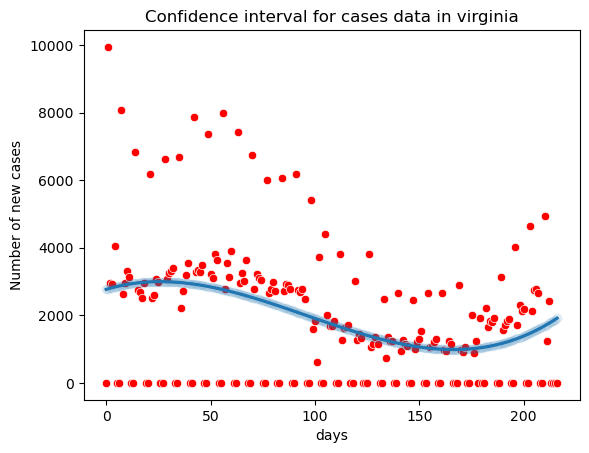

In [80]:
# Plotting the confidence interval for cases data in virginia.

plt.title('Confidence interval for cases data in virginia')
sns.scatterplot(x, yCases, color='red')
sns.lineplot(x, polyCasesPrediction, color='red')
sns.regplot(xAxis['days'], polyCasesPrediction, scatter_kws={'alpha':0.1}, order=3)

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Confidence interval for deaths data in virginia'}, xlabel='days', ylabel='Number of new Deaths'>

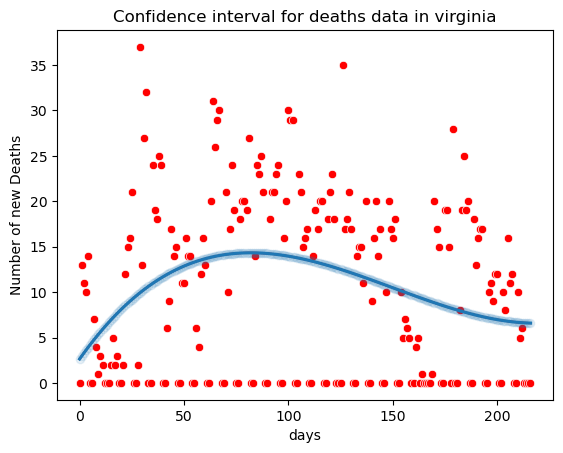

In [81]:
# plotting confidence interval for deaths data in virginia.

plt.title('Confidence interval for deaths data in virginia')
sns.scatterplot(x, yDeaths, color='red')
sns.lineplot(x, polyDeathsPrediction, color='red')
sns.regplot(xAxis['days'], polyDeathsPrediction, scatter_kws={'alpha':0.1}, order=3)

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Confidence interval for cases data in county 1'}, xlabel='days', ylabel='Number of new cases'>

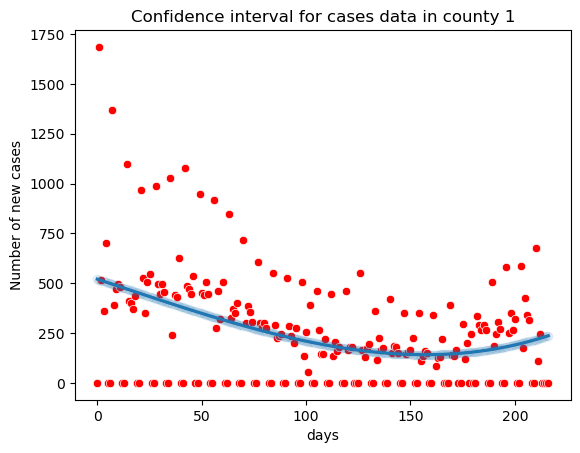

In [82]:
# plotting confidence interval for cases data in county 1.

plt.title('Confidence interval for cases data in county 1')
sns.scatterplot(x, yCasesCounty1, color='red')
sns.lineplot(x, casesPredictionCounty1, color='red')
sns.regplot(xAxis['days'], casesPredictionCounty1, scatter_kws={'alpha':0.1}, order=3)

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Confidence interval for deaths data in county 1'}, xlabel='days', ylabel='Number of new Deaths'>

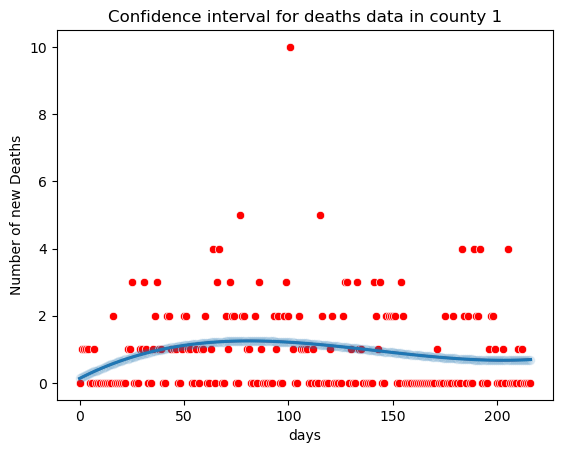

In [83]:
# plotting confidence interval for deaths data in county 1.

plt.title('Confidence interval for deaths data in county 1')
sns.scatterplot(x, yDeathsCounty1, color='red')
sns.lineplot(x, deathsPredictionCounty1, color='red')
sns.regplot(xAxis['days'], deathsPredictionCounty1, scatter_kws={'alpha':0.1}, order=3)

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Confidence interval for cases data in county 2'}, xlabel='days', ylabel='Number of new cases'>

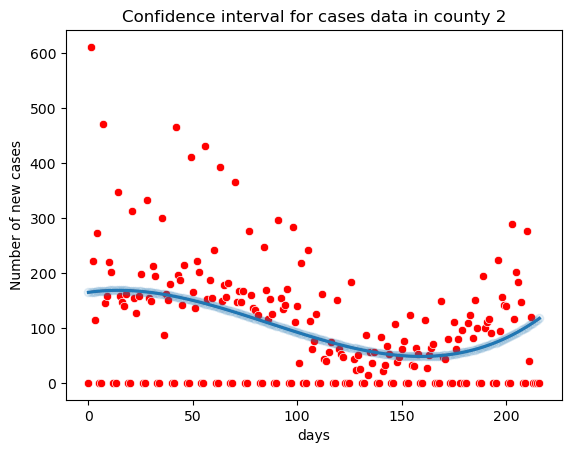

In [84]:
# plotting confidence interval for cases data in county 2.

plt.title('Confidence interval for cases data in county 2')
sns.scatterplot(x, yCasesCounty2, color='red')
sns.lineplot(x, casesPredictionCounty2, color='red')
sns.regplot(xAxis['days'], casesPredictionCounty2, scatter_kws={'alpha':0.1}, order=3)

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Confidence interval for deaths data in county 2'}, xlabel='days', ylabel='Number of new Deaths'>

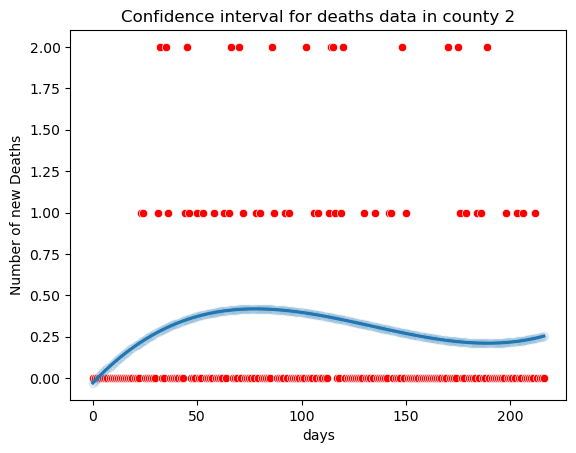

In [85]:
# plotting confidence interval for deaths data in county 2.

plt.title('Confidence interval for deaths data in county 2')
sns.scatterplot(x, yDeathsCounty2, color='red')
sns.lineplot(x, deathsPredictionCounty2, color='red')
sns.regplot(xAxis['days'], deathsPredictionCounty2, scatter_kws={'alpha':0.1}, order=3)

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Confidence interval for cases data in county 3'}, xlabel='days', ylabel='Number of new cases'>

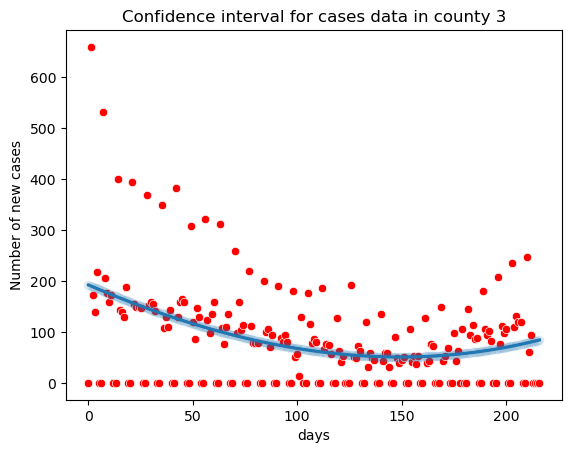

In [86]:
# plotting confidence interval for cases data in county 3.

plt.title('Confidence interval for cases data in county 3')
sns.scatterplot(x, yCasesCounty3, color='red')
sns.lineplot(x, casesPredictionCounty3, color='red')
sns.regplot(xAxis['days'], casesPredictionCounty3, scatter_kws={'alpha':0.1}, order=3)

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Confidence interval for deaths data in county 3'}, xlabel='days', ylabel='Number of new Deaths'>

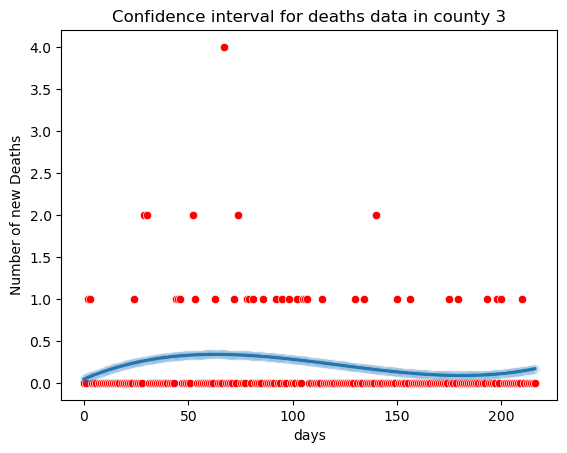

In [87]:
# plotting confidence interval for deaths data in county 3.

plt.title('Confidence interval for deaths data in county 3')
sns.scatterplot(x, yDeathsCounty3, color='red')
sns.lineplot(x, deathsPredictionCounty3, color='red')
sns.regplot(xAxis['days'], deathsPredictionCounty3, scatter_kws={'alpha':0.1}, order=3)

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Confidence interval for cases data in county 4'}, xlabel='days', ylabel='Number of new cases'>

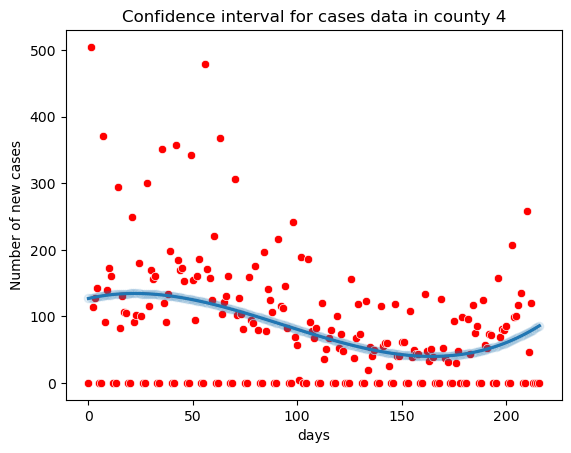

In [88]:
# plotting confidence interval for cases data in county 4.

plt.title('Confidence interval for cases data in county 4')
sns.scatterplot(x, yCasesCounty4, color='red')
sns.lineplot(x, casesPredictionCounty4, color='red')
sns.regplot(xAxis['days'], casesPredictionCounty4, scatter_kws={'alpha':0.1}, order=3)

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Confidence interval for deaths data in county 4'}, xlabel='days', ylabel='Number of new Deaths'>

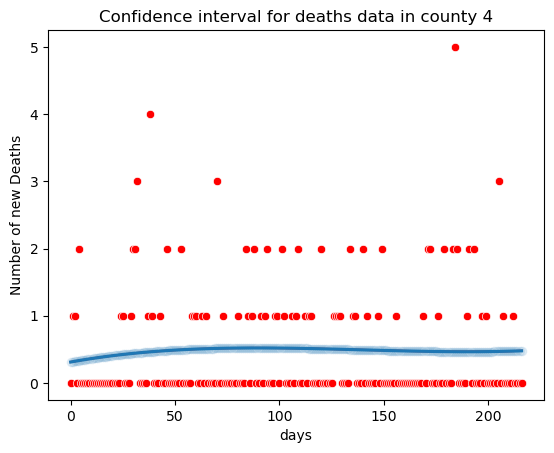

In [89]:
# plotting confidence interval for deaths data in county 4.

plt.title('Confidence interval for deaths data in county 4')
sns.scatterplot(x, yDeathsCounty4, color='red')
sns.lineplot(x, deathsPredictionCounty4, color='red')
sns.regplot(xAxis['days'], deathsPredictionCounty4, scatter_kws={'alpha':0.1}, order=3)

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Confidence interval for cases data in county 5'}, xlabel='days', ylabel='Number of new cases'>

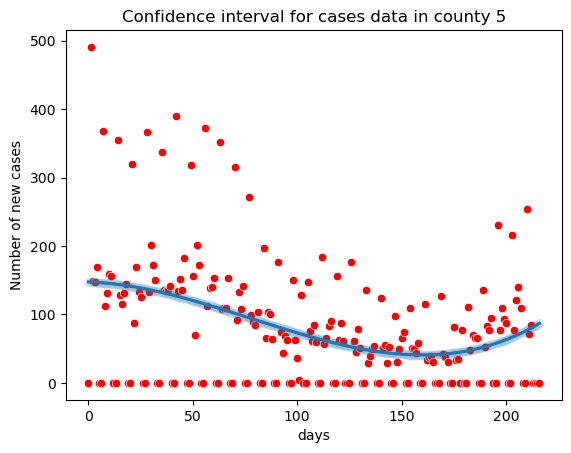

In [90]:
# plotting confidence interval for cases data in county 5.

plt.title('Confidence interval for cases data in county 5')
sns.scatterplot(x, yCasesCounty5, color='red')
sns.lineplot(x, casesPredictionCounty5, color='red')
sns.regplot(xAxis['days'], casesPredictionCounty5, scatter_kws={'alpha':0.1}, order=3)

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Confidence interval for deaths data in county 5'}, xlabel='days', ylabel='Number of new Deaths'>

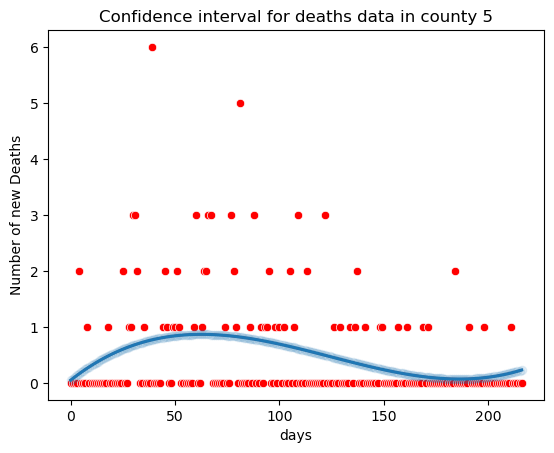

In [91]:
# plotting confidence interval for deaths data in county 5.

plt.title('Confidence interval for deaths data in county 5')
sns.scatterplot(x, yDeathsCounty5, color='red')
sns.lineplot(x, deathsPredictionCounty5, color='red')
sns.regplot(xAxis['days'], deathsPredictionCounty5, scatter_kws={'alpha':0.1}, order=3)

# Prediction Path

In [92]:
x

0        0
1        1
2        2
3        3
4        4
      ... 
212    212
213    213
214    214
215    215
216    216
Name: days, Length: 217, dtype: int64

In [93]:
# Generating forecasting days for 1 week ahead.

predictDays = []
for i in range(len(x), len(x)+7):
    predictDays.append(i)
predictDays = pd.DataFrame({'Future days': predictDays})
predictDays

,Future days
0,217
1,218
2,219
3,220
4,221
5,222
6,223


In [94]:
# Prediction path for Virginia Cases and forecasting cases 1 week ahead.
linearModelCases = LinearRegression()
linearModelCases.fit(xAxis,yCases)
actualCases = linearModelCases.predict(xAxis)

predictCases = linearModelCases.predict(predictDays)
predictCases



C:\Users\venka\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Future days
Feature names seen at fit time, yet now missing:
- days

  warnings.warn(message, FutureWarning)


array([785.60343062, 774.99111694, 764.37880325, 753.76648957,
       743.15417589, 732.5418622 , 721.92954852])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


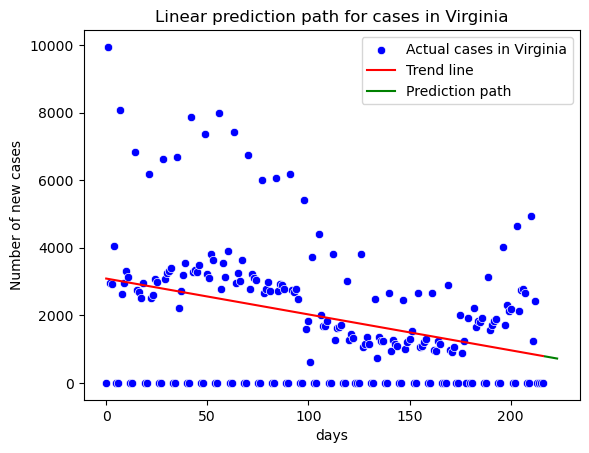

In [95]:
# Prediction path for linear model cases.

plt.title('Linear prediction path for cases in Virginia')
sns.scatterplot(x, yCases, color='blue', label='Actual cases in Virginia')
sns.lineplot(x, actualCases, color='red',  label='Trend line')
sns.lineplot(predictDays['Future days'], predictCases, color='green', label='Prediction path')
plt.legend()


In [96]:
# Prediction path for Virginia Deaths.
linearModelDeaths = LinearRegression()
linearModelDeaths.fit(xAxis,yDeaths)
actualDeaths = linearModelDeaths.predict(xAxis)

predictDeaths = linearModelDeaths.predict(predictDays)
predictDeaths

C:\Users\venka\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Future days
Feature names seen at fit time, yet now missing:
- days

  warnings.warn(message, FutureWarning)


array([9.52432156, 9.51471507, 9.50510858, 9.4955021 , 9.48589561,
       9.47628912, 9.46668264])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


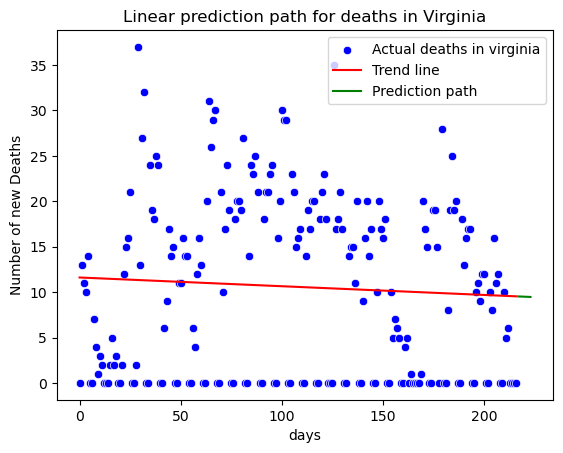

In [97]:
# Plotting prediction path for deaths in Virginia.

plt.title('Linear prediction path for deaths in Virginia')
sns.scatterplot(x, yDeaths, color='blue', label='Actual deaths in virginia')
sns.lineplot(x, actualDeaths, color='red', label='Trend line')
sns.lineplot(predictDays['Future days'], predictDeaths, color='green', label='Prediction path')
plt.legend()

In [98]:
# prediction path for non-linear cases.

nonLinear = PolynomialFeatures(degree=3)
days = np.array(days)
days = days.reshape(-1,1)
xAxisPoly = nonLinear.fit_transform(days)
predictPoly = nonLinear.fit_transform(predictDays)
linearModelCases.fit(xAxisPoly, yCases)

LinearRegression()

In [99]:
# Non-linear cases forecasting.

actualPolyCases = linearModelCases.predict(xAxisPoly)

predictPolyCases = linearModelCases.predict(predictPoly)
predictPolyCases

array([1957.67282124, 2000.26726639, 2043.92153495, 2088.64432264,
       2134.44432517, 2181.33023823, 2229.31075756])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


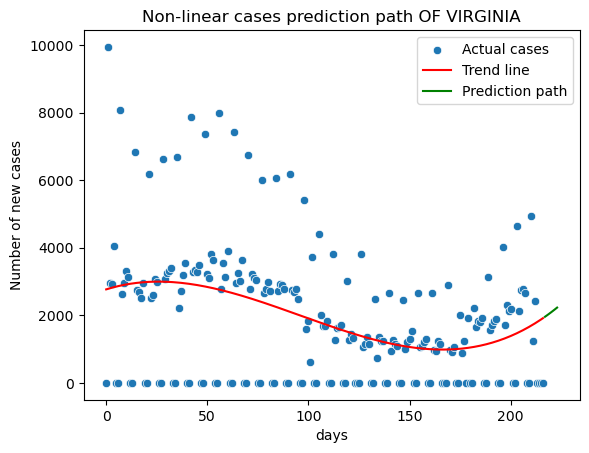

In [100]:
# Plotting non-linear cases forecast.

plt.title('Non-linear cases prediction path OF VIRGINIA')
sns.scatterplot(x, yCases, label='Actual cases')
sns.lineplot(x, actualPolyCases,  color='red', label='Trend line')
sns.lineplot(predictDays['Future days'], predictPolyCases,  color='green', label='Prediction path')
plt.legend()

In [101]:
# Non-linear deaths forecasting.

linearModelDeaths.fit(xAxisPoly, yDeaths)
actualPolyDeaths = linearModelDeaths.predict(xAxisPoly)

predictPolyDeaths = linearModelDeaths.predict(predictPoly)
predictPolyDeaths

array([6.58294897, 6.58009088, 6.57969725, 6.5818045 , 6.58644903,
       6.59366725, 6.60349556])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


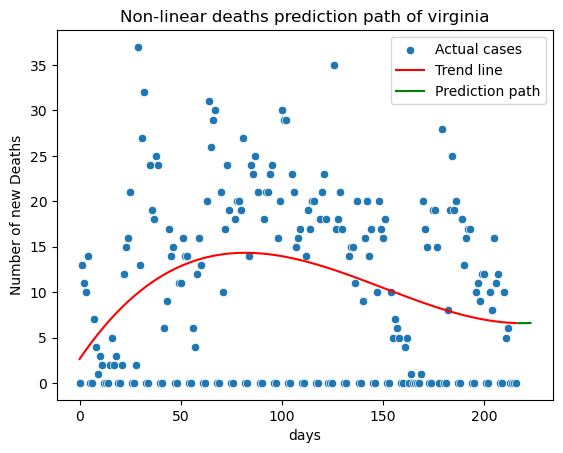

In [102]:
# Plotting non-linear DEATHS forecast.

plt.title('Non-linear deaths prediction path of virginia')
sns.scatterplot(x, yDeaths, label='Actual cases')
sns.lineplot(x, actualPolyDeaths,  color='red', label='Trend line')
sns.lineplot(predictDays['Future days'], predictPolyDeaths,  color='green', label='Prediction path')
plt.legend()

In [103]:
# Non-linear cases forecasting for county 1.

linearModelCases.fit(xAxisPoly, yCasesCounty1)
actualPolyCases = linearModelCases.predict(xAxisPoly)

predictPolyCases = linearModelCases.predict(predictPoly)
predictPolyCases

array([239.86908476, 243.3751597 , 246.94930928, 250.59186306,
       254.30315058, 258.08350137, 261.933245  ])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


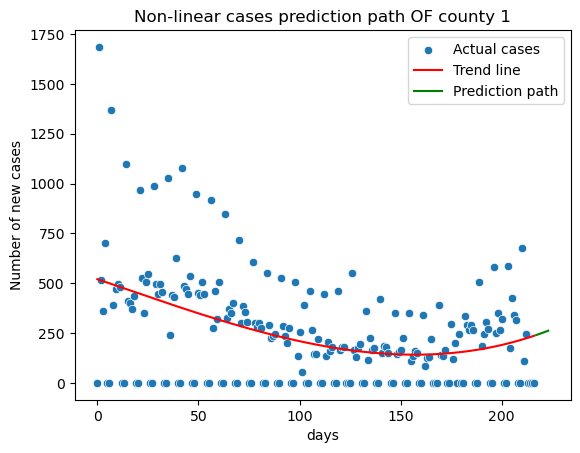

In [104]:
# Plotting non-linear cases forecast for county 1.

plt.title('Non-linear cases prediction path OF county 1')
sns.scatterplot(x, yCasesCounty1, label='Actual cases')
sns.lineplot(x, actualPolyCases,  color='red', label='Trend line')
sns.lineplot(predictDays['Future days'], predictPolyCases,  color='green', label='Prediction path')
plt.legend()

In [105]:
# Non-linear deaths forecasting for county 1.

linearModelDeaths.fit(xAxisPoly, yDeathsCounty1)
actualPolyDeaths = linearModelDeaths.predict(xAxisPoly)

predictPolyDeaths = linearModelDeaths.predict(predictPoly)
predictPolyDeaths

array([0.6992547 , 0.70310661, 0.70725111, 0.71169206, 0.71643331,
       0.72147871, 0.72683211])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


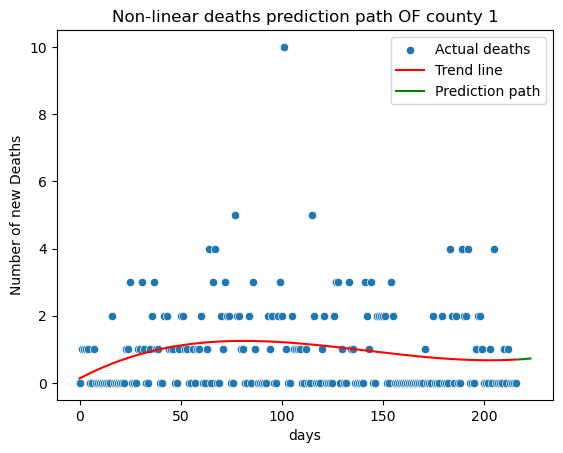

In [106]:
# Plotting non-linear deaths forecast for county 1.

plt.title('Non-linear deaths prediction path OF county 1')
sns.scatterplot(x, yDeathsCounty1, label='Actual deaths')
sns.lineplot(x, actualPolyDeaths,  color='red', label='Trend line')
sns.lineplot(predictDays['Future days'], predictPolyDeaths,  color='green', label='Prediction path')
plt.legend()

In [107]:
# Non-linear cases forecasting for county 2.

linearModelCases.fit(xAxisPoly, yCasesCounty2)
actualPolyCases = linearModelCases.predict(xAxisPoly)

predictPolyCases = linearModelCases.predict(predictPoly)
predictPolyCases

array([120.05966367, 122.84587841, 125.69396622, 128.60439867,
       131.5776473 , 134.61418368, 137.71447935])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


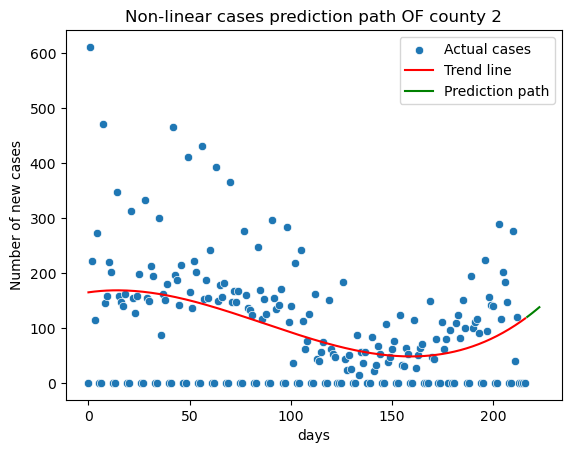

In [108]:
# Plotting non-linear cases forecast for county 2.

plt.title('Non-linear cases prediction path OF county 2')
sns.scatterplot(x, yCasesCounty2, label='Actual cases')
sns.lineplot(x, actualPolyCases,  color='red', label='Trend line')
sns.lineplot(predictDays['Future days'], predictPolyCases,  color='green', label='Prediction path')
plt.legend()

In [109]:
# Non-linear deaths forecasting for county 2.

linearModelDeaths.fit(xAxisPoly, yDeathsCounty2)
actualPolyDeaths = linearModelDeaths.predict(xAxisPoly)

predictPolyDeaths = linearModelDeaths.predict(predictPoly)
predictPolyDeaths

array([0.25673102, 0.26032427, 0.26407046, 0.26797141, 0.27202892,
       0.2762448 , 0.28062086])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


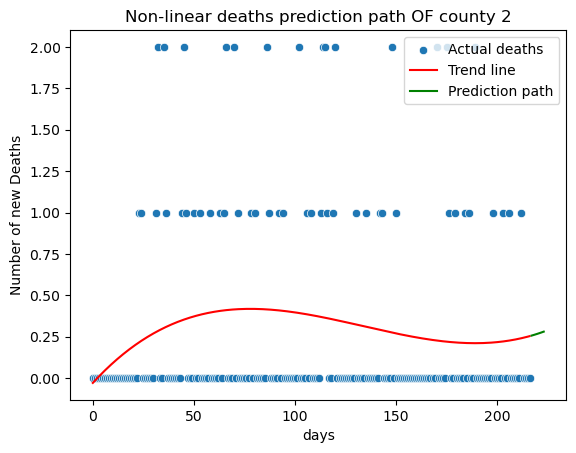

In [110]:
# Plotting non-linear deaths forecast for county 2.

plt.title('Non-linear deaths prediction path OF county 2')
sns.scatterplot(x, yDeathsCounty2, label='Actual deaths')
sns.lineplot(x, actualPolyDeaths,  color='red', label='Trend line')
sns.lineplot(predictDays['Future days'], predictPolyDeaths,  color='green', label='Prediction path')
plt.legend()

In [111]:
# Non-linear cases forecasting for county 3.

linearModelCases.fit(xAxisPoly, yCasesCounty3)
actualPolyCases = linearModelCases.predict(xAxisPoly)

predictPolyCases = linearModelCases.predict(predictPoly)
predictPolyCases

array([85.35910519, 86.40911859, 87.47566752, 88.55878448, 89.65850195,
       90.77485244, 91.90786846])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


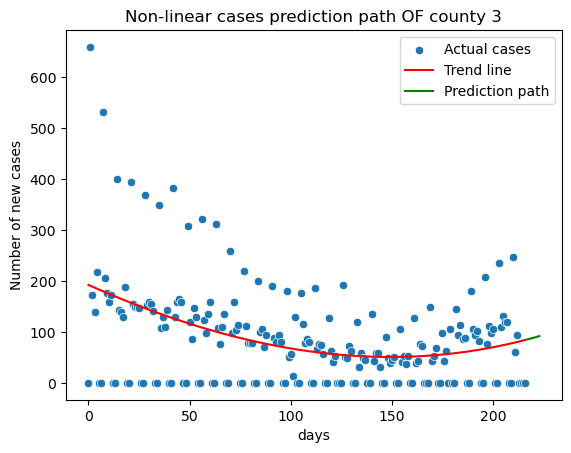

In [112]:
# Plotting non-linear cases forecast for county 3.

plt.title('Non-linear cases prediction path OF county 3')
sns.scatterplot(x, yCasesCounty3, label='Actual cases')
sns.lineplot(x, actualPolyCases,  color='red', label='Trend line')
sns.lineplot(predictDays['Future days'], predictPolyCases,  color='green', label='Prediction path')
plt.legend()

In [113]:
# Non-linear deaths forecasting for county 3.

linearModelDeaths.fit(xAxisPoly, yDeathsCounty3)
actualPolyDeaths = linearModelDeaths.predict(xAxisPoly)

predictPolyDeaths = linearModelDeaths.predict(predictPoly)
predictPolyDeaths

array([0.17418323, 0.17942137, 0.18483717, 0.19043247, 0.19620913,
       0.20216899, 0.20831391])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


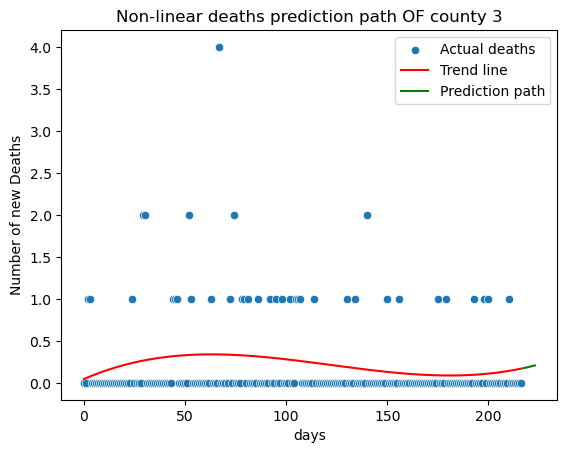

In [114]:
# Plotting non-linear deaths forecast for county 3.

plt.title('Non-linear deaths prediction path OF county 3')
sns.scatterplot(x, yDeathsCounty3, label='Actual deaths')
sns.lineplot(x, actualPolyDeaths,  color='red', label='Trend line')
sns.lineplot(predictDays['Future days'], predictPolyDeaths,  color='green', label='Prediction path')
plt.legend()

In [115]:
# Non-linear cases forecasting for county 4.

linearModelCases.fit(xAxisPoly, yCasesCounty4)
actualPolyCases = linearModelCases.predict(xAxisPoly)

predictPolyCases = linearModelCases.predict(predictPoly)
predictPolyCases

array([ 87.91558164,  89.95260584,  92.0387005 ,  94.17425926,
        96.35967571,  98.59534348, 100.88165619])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


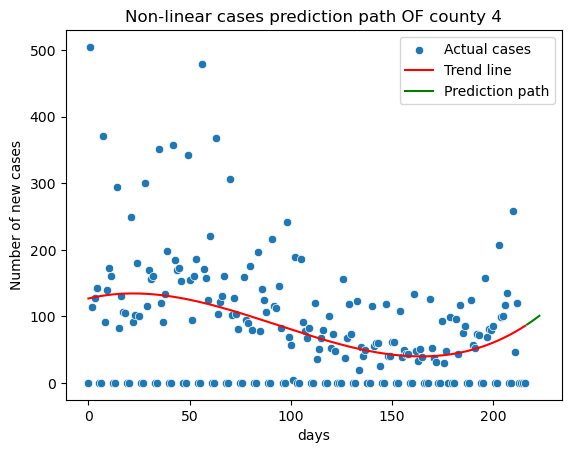

In [116]:
# Plotting non-linear cases forecast for county 4.

plt.title('Non-linear cases prediction path OF county 4')
sns.scatterplot(x, yCasesCounty4, label='Actual cases')
sns.lineplot(x, actualPolyCases,  color='red', label='Trend line')
sns.lineplot(predictDays['Future days'], predictPolyCases,  color='green', label='Prediction path')
plt.legend()

In [117]:
# Non-linear deaths forecasting for county 4.

linearModelDeaths.fit(xAxisPoly, yDeathsCounty4)
actualPolyDeaths = linearModelDeaths.predict(xAxisPoly)

predictPolyDeaths = linearModelDeaths.predict(predictPoly)
predictPolyDeaths

array([0.47903943, 0.48021475, 0.48144187, 0.48272144, 0.48405414,
       0.48544061, 0.48688152])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


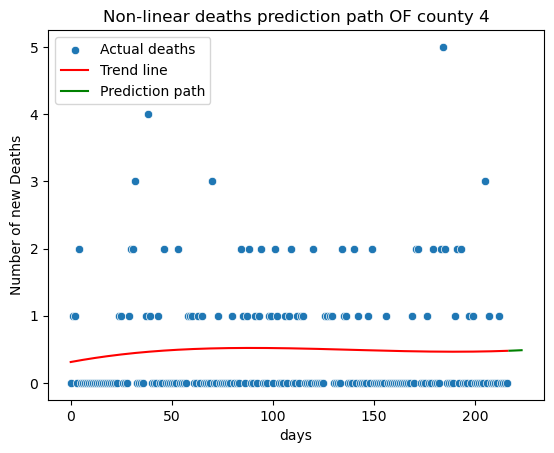

In [118]:
# Plotting non-linear deaths forecast for county 4.

plt.title('Non-linear deaths prediction path OF county 4')
sns.scatterplot(x, yDeathsCounty4, label='Actual deaths')
sns.lineplot(x, actualPolyDeaths,  color='red', label='Trend line')
sns.lineplot(predictDays['Future days'], predictPolyDeaths,  color='green', label='Prediction path')
plt.legend()

In [119]:
# Non-linear cases forecasting for county 5.

linearModelCases.fit(xAxisPoly, yCasesCounty5)
actualPolyCases = linearModelCases.predict(xAxisPoly)

predictPolyCases = linearModelCases.predict(predictPoly)
predictPolyCases

array([ 88.70373095,  90.55699125,  92.45091655,  94.38579694,
        96.36192255,  98.37958346, 100.43906979])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


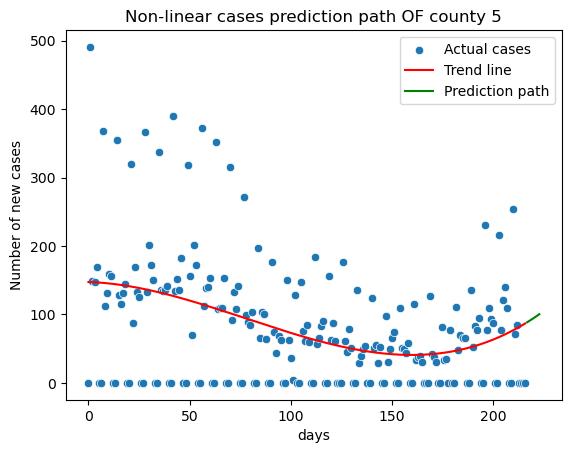

In [120]:
# Plotting non-linear cases forecast for county 5.

plt.title('Non-linear cases prediction path OF county 5')
sns.scatterplot(x, yCasesCounty5, label='Actual cases')
sns.lineplot(x, actualPolyCases,  color='red', label='Trend line')
sns.lineplot(predictDays['Future days'], predictPolyCases,  color='green', label='Prediction path')
plt.legend()

In [121]:
# Non-linear deaths forecasting for county 5.

linearModelDeaths.fit(xAxisPoly, yDeathsCounty5)
actualPolyDeaths = linearModelDeaths.predict(xAxisPoly)

predictPolyDeaths = linearModelDeaths.predict(predictPoly)
predictPolyDeaths

array([0.24194867, 0.25419066, 0.26690606, 0.28009993, 0.29377732,
       0.30794329, 0.32260291])

C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


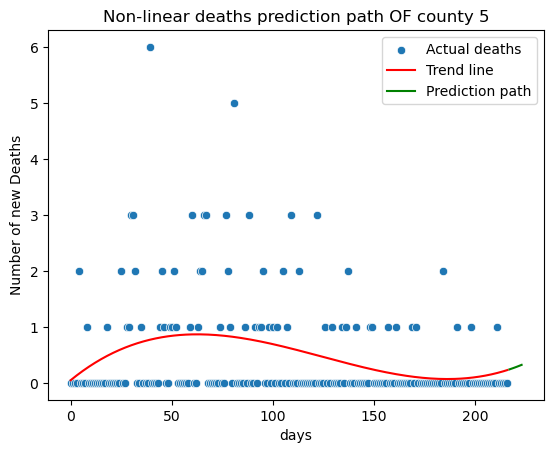

In [122]:
# Plotting non-linear deaths forecast for county 5.

plt.title('Non-linear deaths prediction path OF county 5')
sns.scatterplot(x, yDeathsCounty5, label='Actual deaths')
sns.lineplot(x, actualPolyDeaths,  color='red', label='Trend line')
sns.lineplot(predictDays['Future days'], predictPolyDeaths,  color='green', label='Prediction path')
plt.legend()

# References

1) https://www.tutorialspoint.com/how-to-visualize-95-confidence-interval-in-matplotlib

2) https://stackoverflow.com/questions/41328922/python-pandas-simple-example-of-calculating-rmse-from-data-frame

3) https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

4)https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

5) https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

6)https://scikitlearn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.fit_transform

